## 1 benchmarks for numerical estimates

In [216]:
# Import Python Packages
import numpy as np
import math 
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
# given mean and covariance
d = 4
mean_1 = np.array([1, 3, 5, 7])
cov_1 = np.array(
    [
        [1, 0, 0, 0],
        [0, 2.25, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 0, 6.25],
    ],
)

# range of alpha
a_range=np.vstack(np.linspace(0,1,20,endpoint=False)[1:])

In [236]:
# model function
def func1(args):
    result = np.sum(args, axis=1)
    return result

In [286]:
# sobol indices
S_i = []
for i in range(d):
    S_i_i = cov_1[i,i]/np.trace(cov_1)
    S_i.append(S_i_i)

S_i = np.hstack(S_i)
S_i = np.tile(S_i, (len(a_range),1))
                       
print(S_i)

[[0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07407407 0.16666667 0.2962963  0.46296296]]


In [220]:
# inverse error function
def inv_error(a):
    phi_inv = norm.ppf(a)
    return phi_inv


phi_inv = inv_error(a_range)

In [221]:
# q_2: PDF of the out put Y(Eq.30)
q_2 = []
for a in range(len(a_range)):
    q_2_a = []
    for i in range(d):
        q_2_i = cov_1[i,i] + phi_inv[a]**2*(math.sqrt(np.trace(cov_1))-math.sqrt(sum(cov_1[j,j] for j in range(d) if j != i)))**2
        q_2_a.append(q_2_i)
    q_2.append(q_2_a)
    
q_2 = np.vstack(q_2).reshape((len(a_range),d))
print(q_2)

[[1.05204894 2.52727738 4.94828404 8.85717277]
 [1.03159581 2.4183186  4.5756468  7.83265943]
 [1.02066523 2.3600887  4.37650151 7.28513761]
 [1.0136267  2.32259276 4.24826603 6.93257231]
 [1.00875202 2.29662412 4.15945371 6.68839542]
 [1.00529034 2.27818293 4.09638515 6.51499734]
 [1.00285628 2.26521613 4.0520389  6.39307358]
 [1.00123478 2.25657797 4.02249654 6.31185107]
 [1.00030378 2.25161832 4.00553461 6.26521664]
 [1.         2.25       4.         6.25      ]
 [1.00030378 2.25161832 4.00553461 6.26521664]
 [1.00123478 2.25657797 4.02249654 6.31185107]
 [1.00285628 2.26521613 4.0520389  6.39307358]
 [1.00529034 2.27818293 4.09638515 6.51499734]
 [1.00875202 2.29662412 4.15945371 6.68839542]
 [1.0136267  2.32259276 4.24826603 6.93257231]
 [1.02066523 2.3600887  4.37650151 7.28513761]
 [1.03159581 2.4183186  4.5756468  7.83265943]
 [1.05204894 2.52727738 4.94828404 8.85717277]]


In [222]:
# Q_2: quantile based sensitivit measure 2.(Eq.14)
Q_2 = []
for a in range(len(a_range)):
    Q_2_a = []
    for i in range(d):
        Q_2_i = q_2[a,i]/sum(q_2[a])
        Q_2_a.append(Q_2_i)
    Q_2.append(Q_2_a)

Q_2 = np.hstack(Q_2).reshape((len(a_range),d))
print(Q_2)

[[0.06051551 0.14537296 0.28463306 0.50947847]
 [0.06505117 0.15249621 0.28853469 0.49391792]
 [0.06785258 0.15689583 0.2909445  0.48430709]
 [0.06982315 0.1599906  0.2926396  0.47754665]
 [0.07127365 0.1622686  0.29388734 0.47257041]
 [0.07234982 0.16395873 0.29481307 0.46887837]
 [0.07313081 0.16518527 0.29548489 0.46619904]
 [0.07366267 0.16602055 0.2959424  0.46437438]
 [0.07397234 0.16650689 0.29620878 0.46331199]
 [0.07407407 0.16666667 0.2962963  0.46296296]
 [0.07397234 0.16650689 0.29620878 0.46331199]
 [0.07366267 0.16602055 0.2959424  0.46437438]
 [0.07313081 0.16518527 0.29548489 0.46619904]
 [0.07234982 0.16395873 0.29481307 0.46887837]
 [0.07127365 0.1622686  0.29388734 0.47257041]
 [0.06982315 0.1599906  0.2926396  0.47754665]
 [0.06785258 0.15689583 0.2909445  0.48430709]
 [0.06505117 0.15249621 0.28853469 0.49391792]
 [0.06051551 0.14537296 0.28463306 0.50947847]]


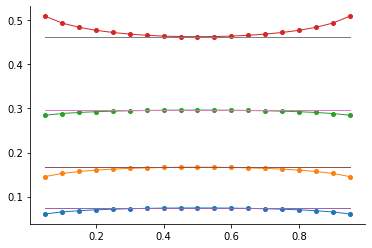

In [294]:
ax = plt.subplot(111)

# plot sobol indice
ax.plot(a_range,Q_2, marker='o', markersize=4, linewidth=1)

# plot Q_2
ax.plot(a_range,S_i, linewidth=1)

## 2 Monte Carlo estimator

### 2.1 Generate samples for x

In [ ]:
# The number of samples
N = 100

# Generate sample for x given mean and covariance
x_j = np.random.multivariate_normal(mean_1,cov_1,N) # shape:(N, d)
x_j = np.sort(x_j_temp) # shape:(100, 4)

### 2.2 Get output Y by using function and sample x

In [299]:
Y_j = func1(x_j).reshape((N,1))

### 2.3 CDF as a function of y

In [300]:
# estimating CDF for joint distrubution(Eq.21a)
def estimate_CDF(y):
    result = 1/N*sum(Y_j<y)
    return result

y = ??
F_Y = estimate_CDF(y)


### 2.4 Inverse CDF

In [ ]:
# estimates of quantiles/inverse CDF (Eq. 22)
from scipy.optimize import minimize


x = np.arange(np.min(F_Y),np.max(F_Y),0.1)
y = np.zeros(x_j.shape)

def diff(x_j,a):
    yt = function(x_j)
    return (yt - a )**2

for idx,x_value in enumerate(x_j):
    res = minimize(diff, 1.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
    Y_j[idx] = res.x

### 2.5 Get measures